# Unsupervised Learning Techniques
Learning where we have the input data $\mathbf{x}$ but do not have the labels $\mathbf{y}$. Some examples of common *unsupervised learning* tasks:
* *clustering* - grouping similar instances together into *clusters*
* *anomaly* detection - learinig what "normal" data look like and distinguisting abnormal instances
* *dimensionality-reduction* - reducing the dimension of the inputs
* *density estimation* - estimating the *probability density function (PDF)*

## Clustering
This task is just like classification (each instance is assigned to a group) but without class labels.

Example applications:
* data analysis
* dimensionality reduction technique
* outlier detection
* semi-supervised learning
* search engines
* image segmentation
* customer segmentation

### K-Means
*K-means* is a simple iterative clustering algorithm. It is fast and usually pretty good in practice. 

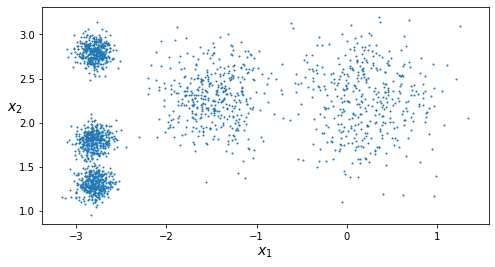

In [1]:
# FIXME: meke autocompletion working again
%config Completer.use_jedi = False

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

np.random.seed(42)

# Create blobs dataset
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]],
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(
    n_samples=2000,
    centers=blob_centers,
    cluster_std=blob_std,
    random_state=7,
)


def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

    
# Plot the dataset
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [2]:
from sklearn.cluster import KMeans

k = 5

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [3]:
y_pred is kmeans.labels_

True

In [4]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [5]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

#### Decision Boundaries

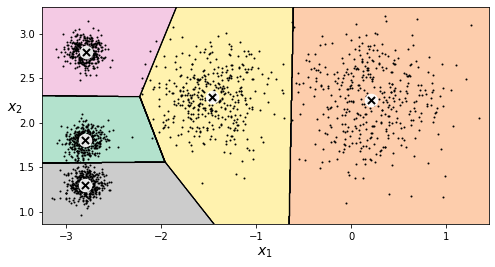

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

    
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=30, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=50, linewidths=2, color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    
    plot_data(X)
    
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

#### Hard Clustering vs Soft Clustering
* **hard clustering** - assign each instance to exactly one cluster
* **soft clustering** - give each instance a score per cluster (can be distance to cluster centroid or similarity score/affinity - e.g. a RBF)

In *Scikit-Learn*,  `KMeans`' `transform` method measures the distance from each instance to every centroid. 

In [8]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [9]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

#### K-Means Algorithm
1. Initialize $k$ cluster centroids ($k$ distinct instances are picked from the dataset at random as the initial cluster centroids)
1. Repeat until convergence (e.g. until centroids stop moving):
  1. Assign each instance to the closest centroid (based on some measure)
  1. Update the centroids to be the mean of instances that are assigned to them
  
Computational complexity of *K-means* is generaly linear w.r.t. number of instances, clusters and features ($m$, $k$, $n$) **if** the data has a clustering structure. If it doesn't then the worst case scenario is exponential w.r.t. $m$ - in practice this does not happen and *k-means* is really fast clustering algorithm.

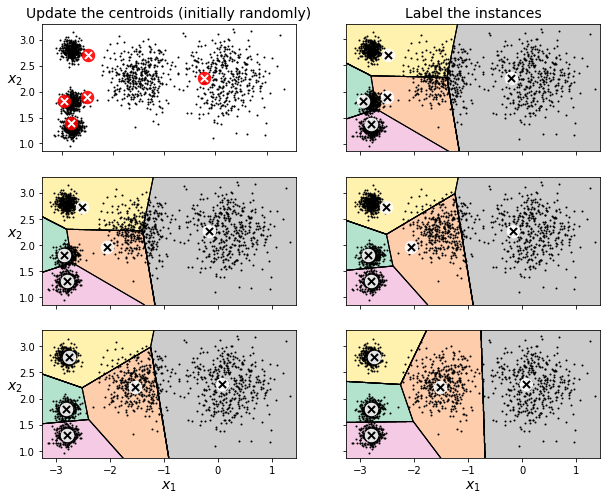

In [10]:
def fit_kmeans(X, max_iter):
    # Manually set these hyperparameters - `KMeans` by default uses an optimized algorithm
    kmeans = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", max_iter=max_iter, random_state=1)
    return kmeans.fit(X)


kmeans_iter1 = fit_kmeans(X, max_iter=1)
kmeans_iter2 = fit_kmeans(X, max_iter=2)
kmeans_iter3 = fit_kmeans(X, max_iter=3)

plt.figure(figsize=(10, 8))

# K-means (init)
plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

# K-means (iteration 1)
plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

# K-means (iteration 2)
plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

# K-means (iteration 3)
plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

#### Centroid initialization methods
A big disadvantage of k-means is it's sensitivity to centroid initialization. Depending on the inital step, it may converge to very different (and bad) solutions.

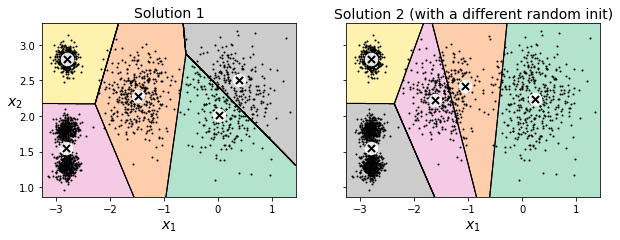

In [11]:
plt.figure(figsize=(10, 3.2))

# Solution 1
kmeans_rnd_init1 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", random_state=11)
kmeans_rnd_init1.fit(X)

plt.subplot(121)
plot_decision_boundaries(kmeans_rnd_init1, X)
plt.title("Solution 1", fontsize=14)

# Solution 2
kmeans_rnd_init2 = KMeans(n_clusters=k, init="random", n_init=1, algorithm="full", random_state=19)
kmeans_rnd_init2.fit(X)

plt.subplot(122)
plot_decision_boundaries(kmeans_rnd_init2, X, show_ylabels=False)
plt.title("Solution 2 (with a different random init)", fontsize=14)

plt.show()

First option how to tackle this is to initialize the centroids with **good instances** known ahead. This can be easily achieved as follows:
```python
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=k, init=good_init, n_init=1)
```

Another option is to run k-means multiple times (notice `n_init` in examples above) and select the best model based on a performance metric called **inertia** which is the total mean squared distance of all instances to their closest centroid. `KMeans` class keeps track of the best model automatically and stores the best inertia in `inertia_` attribute. It's negative is also returned as the score (negative because better score is higher score).

In [12]:
kmeans.score(X)

-211.5985372581683

An important improvement is a variation called *K-Means++* which uses a smart initialization that tends to select centroids far apart which makes the algorithm less likely to converget to sub-optimal solution (thus reducing the number of restarts needed).

The centroid initialization of this method goes as follows:
1. Take one centroid $\mathbf{c}^{(1)}$ uniformly at random from the dataset
1. Take a new centroid $\mathbf{c}^{(i)}$ using an instance $\mathbf{x}^{(i)}$ selected with probability $D(\mathbf{x}^{(i)})^2 / \sum_{j = 1}^m D(\mathbf{x}^{(i)})^2$ where $D(\mathbf{x}^{(i)})$ is the distance between the instance and the closest centroid that has already been chosen
1. Repeat previous step until $k$ cetroids are selected

`KMeans` class uses this method by default - original algoritm can be forced by `init="random"` (used above - extremely rare in practice).

#### Accelerated K-Means
Another speedup can be achieved by avoiding unnecessary distance calculations. By default `KMeans` uses `algorithm="elkan"` which takes expoits the triangle inequality and tracking of lower and upper distance bounds between instances and centroids. Original approach can again be forced with `algorithm="full"` as shown above (rarely used in practice).

In [13]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

212 ms ± 76.6 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [14]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

112 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


#### Mini-batch K-Means
This variant of k-means can partially fit the model using mini-batches which
* speeds up the training 3-4x
* allows out-of-core and online learning

In [15]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
minibatch_kmeans.fit(X)

minibatch_kmeans.inertia_

211.93186531476786

This class can either be incrementally updated using `partial_fit` or one can use memory-mapped file with `memmap` and regular `fit` (the implementation is smart enough to load only chunks of the dataset into memory).

In [16]:
import os

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Fetch the MNIST dataset
mnist = fetch_openml("mnist_784", version=1)
mnist.target = mnist.target.astype(np.int64)

# Split it to training and test sets
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

# Create a memory mapped file of the training dataset
X_mm = np.memmap("/tmp/my_mnist.data", dtype=np.float32, mode="write", shape=X_train.shape)
X_mm[:] = X_train

# Train mini-batch K-Means on the memory-mapped dataset
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

If your data is so large that `memmap` can't be used, one has to do it manually and train using `partial_fit`.

In [17]:
np.random.seed(42)

# Note: This example uses the blobs dataset from above

# Here one would normally load chunks of the dataset from the filesystem or elsewhere
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]


n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

# Best model overall (in terms of inertia)
best_kmeans = None

# Multiple initializations
for init in range(n_init):
    # Initialize new mini-batch k-means model
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    # Load chunks of the dataset and each time partially fit the model
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    # Keep the model with the lowest inertia
    if (best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

# Evaluate the model
best_kmeans.score(X)

-211.70999744411446

In [18]:
%timeit KMeans(n_clusters=k).fit(X)

69.8 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%timeit MiniBatchKMeans(n_clusters=k).fit(X)

24.2 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Mini-batch approach is much faster! However, its performance is often lower (higher inertia), and it keeps degrading as $k$ increases.

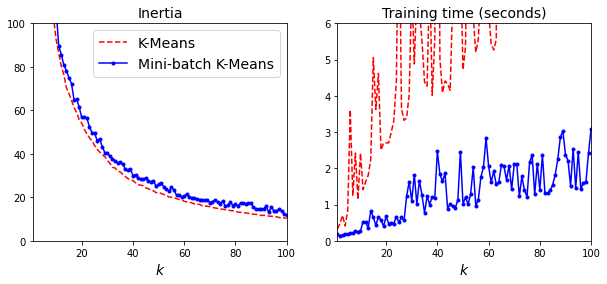

In [20]:
from timeit import timeit

k_max = 100

# Measure learning time and inertia of regular K-Means and mini-batch K-Means for varying k
times = np.empty((k_max, 2))
inertias = np.empty((k_max, 2))
for k in range(1, k_max + 1):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_
    
# Plot the results
plt.figure(figsize=(10,4))

# Inertia vs varying number of clusters
plt.subplot(121)
plt.plot(range(1, k_max + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, k_max + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=14)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, k_max, 0, 100])

# Time vs varying number of clusters
plt.subplot(122)
plt.plot(range(1, k_max + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, k_max + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=14)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, k_max, 0, 6])

plt.show()

#### Finding the optimal number of clusters
A natural question is what if the number of clusters is not known ahead? For instance, what happens if we increase or decrease $k$ in the example above?

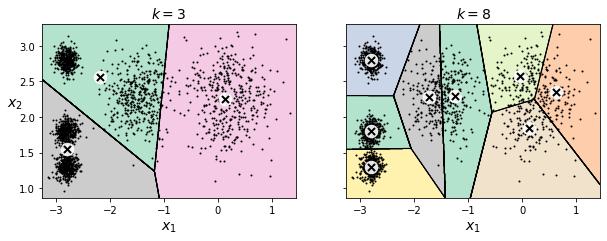

In [21]:
plt.figure(figsize=(10, 3.2))

# K-means with `k=3`
plt.subplot(121)
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k3.fit(X)
plot_decision_boundaries(kmeans_k3, X)
plt.title("$k=3$", fontsize=14)

# K-means with `k=8`
plt.subplot(122)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)
kmeans_k8.fit(X)
plot_decision_boundaries(kmeans_k8, X, show_ylabels=False)
plt.title("$k=8$", fontsize=14)

plt.show()

In [22]:
(kmeans_k3.inertia_, kmeans_k8.inertia_)

(653.2167190021556, 119.11983416102889)

One can't simply search for minimum inertia as it it only drops with increasing $k$. Instead one has to search for a point after which the inertia drop rate "significantly decreases" - i.e. look for the *elbow*.

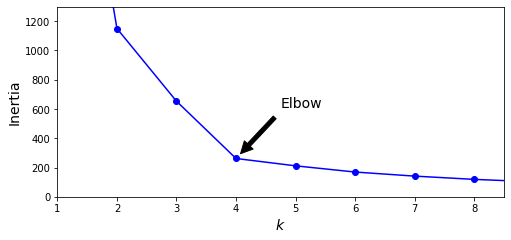

In [23]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

k_elbow = 4
inertia_elbow = inertias[k_elbow - 1]

plt.figure(figsize=(8, 3.5))

plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate(
    'Elbow',
     xy=(k_elbow, inertia_elbow),
     xytext=(0.55, 0.55),
     textcoords='figure fraction',
     fontsize=14,
     arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.axis([1, 8.5, 0, 1300])

plt.show()


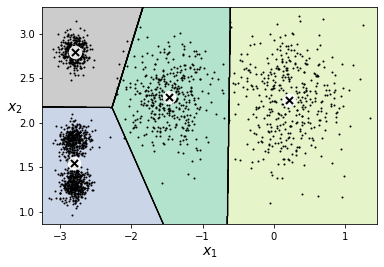

In [24]:
plot_decision_boundaries(kmeans_per_k[k_elbow - 1], X)
plt.show()

Better but more computationally demadning option is to compute the **silhouette score** which is the mean **silhouette coefficient** over all instances. A *silhouette coefficient* is defined as $\frac{b - a}{\max(b, a)}$ where $a$ is the mean distance to other instances in the same cluster (*intra-cluster* distance) and $b$ is the mean *nearest-cluster* distance.

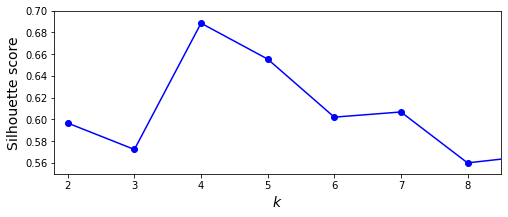

In [25]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))

plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

An even more informative visualization is given when you plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a **silhouette diagram**.

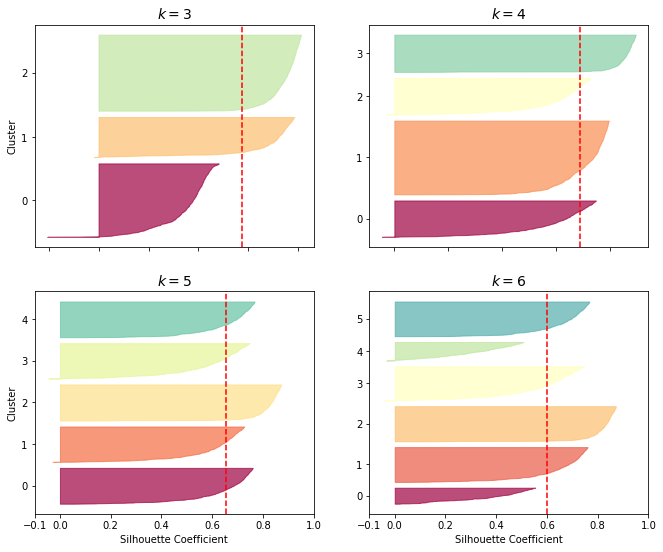

In [26]:
import matplotlib as mpl

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(
            np.arange(pos, pos + len(coeffs)),
            0,
            coeffs,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=14)

plt.show()

### Limits of K-Means
* First disadvantage is its sub-optimality and resulting necessity to restart it multiple times
* Sometimes it is not quite straightforward to determine appropriate number of clusters
* Moreover, k-means does not behave very well when clusters have varying sizes, different densities or non-spherical shapes.

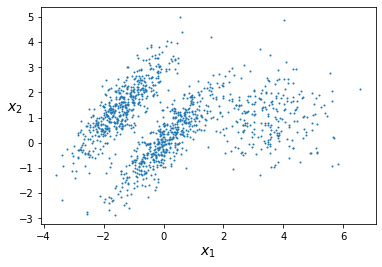

In [27]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))

X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]

X = np.r_[X1, X2]
y = np.r_[y1, y2]

plot_clusters(X)

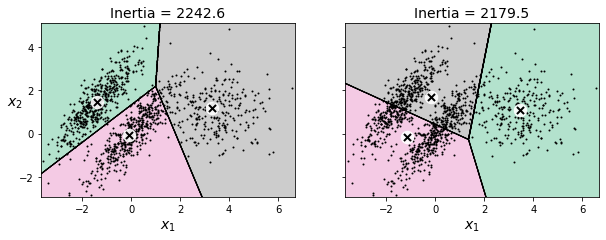

In [28]:
plt.figure(figsize=(10, 3.2))

# "good" clustering
plt.subplot(121)
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_good.fit(X)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

# really bad clustering
plt.subplot(122)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_bad.fit(X)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

### Using clustering for image segmentation
**Image segmentation** is a task of dividing an image into multiple parts (segments). Two common sub-tasks are:
* *semantic segmentation* - e.g. self-driving car detecting in an camera image a segment containing *all* the pedesrians
* *instance segmentation* - from the same analogy, in this case we would detect individual pedestrians (i.e. distinguish one from another)
* *color segmentation* - simply assign pixels to the same segment if they have similar color

State-of-the-art approaches usually use (deep) neural networks but let's try simple color segmentation using k-means.

In [33]:
import urllib

from matplotlib.image import imread

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master"

os.makedirs("images", exist_ok=True)
img_path = os.path.join("images", "ladybug.png")

if not os.path.exists(img_path):
    urllib.request.urlretrieve(f"{DOWNLOAD_ROOT}/images/unsupervised_learning/ladybug.png", img_path)

image = imread(img_path)    
image.shape

(533, 800, 3)

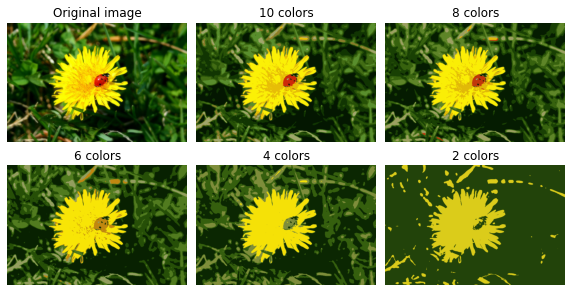

In [36]:
X = image.reshape(-1, 3)

def segment_image(colors):
    # Fit the model to `k=colors` clusters
    kmeans = KMeans(n_clusters=colors, random_state=42).fit(X)
    # Reconstruct the segmented image
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    return segmented_img.reshape(image.shape)

n_colors = (10, 8, 6, 4, 2)

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

# Original image
plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

# Plot segmented images for varying number of colors (segments)
for idx, segmented_img in enumerate(map(segment_image, n_colors)):
    plt.subplot(232 + idx)
    plt.imshow(segmented_img)
    plt.title(f"{n_colors[idx]} colors")
    plt.axis("off")

plt.show()

### Using Clustering for Preprocessing
Clustering can be an efficient pre-processing step before a supervised learning algorithm. Following example is such application to a MNIST-like dataset.

In [37]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load MNIST-like dataset and split it to training and test sets
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# Train plain logistic regression model
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the plain model on the test set
log_reg.score(X_test, y_test)

0.9688888888888889

In [39]:
from sklearn.pipeline import Pipeline

# Run a 50 cluster k-means before the regression and fit the regreession to instance-cluster distances instead
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

# Evaluate this pipeline on the test set
pipeline.score(X_test, y_test)

0.9777777777777777

With a supervised learning algorithm following the K-means step, it is now easy to search for appropriate number of clusters - just treat is as another hyper-parameter and optimize the pipeline using cross-validation.

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             n_jobs=-1, param_grid={'kmeans__n_clusters': range(2, 100)},
             verbose=2)

In [41]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [42]:
grid_clf.score(X_test, y_test)

0.9777777777777777

### Clustering for Semi-supervised Learning
**Semi-supervised learning** deals with situation where only a small portion of the inputs have associated labels. Let's see how clustering can help on the digits dataset from previous example.

In [43]:
n_labeled = 50

# Train logistic regression on **50 examples** only
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# Evaluate the regression model
log_reg.score(X_test, y_test)

0.8333333333333334

This is much worse than before due to the reduced dataset. Now let's try to replace these 50 instances with new ones. We will run a clustering (k-means) to find 50 clusters and then for each centroid the closest instance in the original dataset.

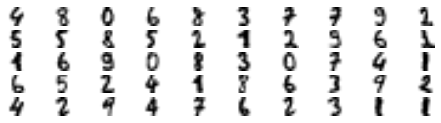

In [50]:
k = 50

# Cluster the dataset to `k=50` clusters and save the instance-centroind distances
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

# For each centroid, find the closest instance in the original dataset
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

# Plot these representatives
plt.figure(figsize=(8, 2))

for i, digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, i + 1)
    plt.imshow(digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

Next, *manually* label these representative instances. I.e. instead of labelling 50 random instances the original dataset. Then train the same regression model on these representatives and see the difference.

In [52]:
# Manually label representatives
y_representative_digits = np.array([
    4, 8, 0, 6, 8, 3, 7, 7, 9, 2,
    5, 5, 8, 5, 2, 1, 2, 9, 6, 1,
    1, 6, 9, 0, 8, 3, 0, 7, 4, 1,
    6, 5, 2, 4, 1, 8, 6, 3, 9, 2,
    4, 2, 9, 4, 7, 6, 2, 3, 1, 1,
])

# Train logistic regression model on the representative instances
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

# Evaluate this model on the original test set
log_reg.score(X_test, y_test)

0.9222222222222223

Next improvement is to propagate the labels to all instances in the same cluster. Then we can train yet another regression model, this time on the whole training set but with newly propagated labels.

In [53]:
# Create new labels for **all** training instances
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for cluster in range(k):
    # Propagate cluster's label to all instances in that cluster
    y_train_propagated[kmeans.labels_ == cluster] = y_representative_digits[cluster]
    
# Train logistic regression on the full original training set with labels propagated from the clustering
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

# Evaluate this model on the test set
log_reg.score(X_test, y_test)

0.9333333333333333

There is some small imrovement but the issue here is that this hard propagation assigns cluster's label even to instances that are close to the boundary of two clusters. Instead, we could propagate the labels just to 20% instances closest to the centroid.

In [57]:
percentile_closest = 20

# For each instance take the distance to it's cluster centroid
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for cluster in range(k):
    # Find indices of instances assigned to this cluster
    in_cluster = (kmeans.labels_ == cluster)
    # Compute the cutoff distance for instances in cluster (note: an instance can be assigne to exactly one cluster)
    cutoff_distance = np.percentile(X_cluster_dist[in_cluster], percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    # Set the distance to -1 if an instance is not in the 20% closest ones
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
# Find instances that fall to the 20% cutoff range of their associated centroids and construct new dataset from these
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

# Train logistic regression on this dataset with partially propagated labels
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

# Evaluate the regression model on the test set
log_reg.score(X_test, y_test)

0.94

**Active learning** is a method which iterates on the above:
1. Manually label the instances that the classifier is least sure about, if possible by picking them in distinct clusters
1. Train a new model with these additional labels

## DBSCAN
Different approach from *K-Means* presents algorithm called **DBSCAN**. This algorithm defines clusters as continuous regions of high density and works as follows:
* For each instance it counts how many instances are in its $\epsilon$*-neighborhood*
* If an instance has at least `min_samples` in its neighborhood, it's called a *core instance*
* All instances in the neighborhood of a core instance belong to the same cluster
* Any non-core instance that has empty neighborhood is considered an anomaly

Some properties fo *DBSCAN*:
* Works well if the clusters form regions of high density and are separated by low density regions
* Can find clusters of any shape as long as the density does not significantly vary between them
* Robust to outliers
* Has just two hyperparameters (`eps` and `min_samples`)
* Roughly $\mathcal{O}(m log(m))$ time complexity but up to $\mathcal{O}(m^2)$ if `eps` is large

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Make some moons dataset
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Fit a DBSCAN model
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [68]:
# Labels (clusters) for all instances (first 10 shown), instances with label -1 are anomalies
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [69]:
len(dbscan.core_sample_indices_)

808

In [70]:
# Indices of core instances (first 10 shown)
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [71]:
# Core instances
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [73]:
# All the unique clusters found (plus the anomaly class)
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

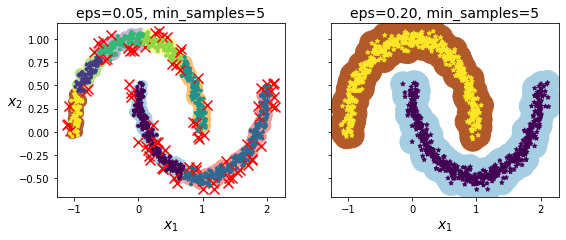

In [74]:
# Fit another DBSCAN with 0.2 neighborhoods
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)
    
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

`DBSCAN` does not have a `predict` method so for new instances one has to use some classification algorithm depending on the task - e.g *KNN*.

In [77]:
from sklearn.neighbors import KNeighborsClassifier

# Let's keep the better model
dbscan = dbscan2

# Train a KNN classifier (`k=50`) with core instances as inputs and their clusters as labels
# This choice depends on the task, but we could easily train it on the whole dataset or all but anomalies
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# Assign new instances to learned clusters
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [78]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

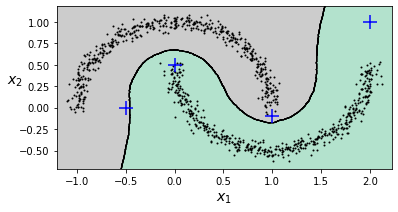

In [79]:
plt.figure(figsize=(6, 3))

plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

Previous example show that every new instance is assigned to a cluster even though some are very far away. Let's use `kneighbors` and a distance threshold to mark those as anomalies instead.

In [80]:
# Returns distances to and indices of the k nearest neighbors to given instances
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)

# Corresponding clusters
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]

# Distance cutoff to mark far away instances as anomalies
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

### Other Clustering Algorithms
* **Agglomerative clustering** - Hierarchical clustering that works bottom up merging individual instances and smaller clusters into larger ones. It scales very well to large number of instances given a pairwise distance metric and sparse $m \times m$ instance adjecency matrix. Resulting cluster tree is very flexible and informative in the sense of number of clusters we need (provides multiple partitionings) and can capture clusters of various shapes.
* **BIRCH** - Stands for *Balanced Iterative Reducing and Clustering using Hierarchies* is very fast and scalable algorithm with similar resutls to K-Means. It does not scale well if the number of features is high (more than 20).
* **Mean-Shift** - This algorithm starts by placing a circle of predefined radius at each instance. Then it computes the mean of all instances in that circle and shifts the circle to it. This repeats until convergence and all instances with their circle in the same place form a cluster. Unfortunatly, its computational complexity is $\mathcal{O}(m^2)$ and it can chop clusters with variations in their internal density - but otherwise has the same nice properties as *DBSCAN*.
* **Affinity propagation** - A voting system where instances vote for similar instances to be their representatives - after convergence voters and their representatives form a cluster. The drawback is $\mathcal{O}(m^2)$ time complexity.
* **Spectral clustering** - This approach takes an instance similarity matrix and creates a low-dimensional embedding from it and then uses another clustering algorithm on it (e.g. K-Means). It can capture complex cluster structures and works well on graphs but does not scale well with the nuber of instances and does not behave well when clusters have different sizes.

#### Spectral Clustering

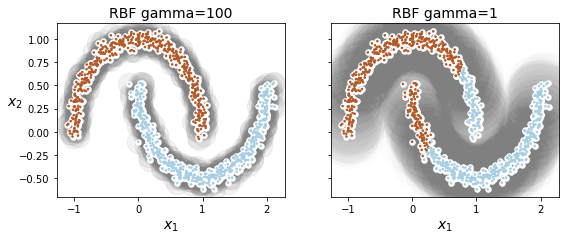

In [82]:
from sklearn.cluster import SpectralClustering

def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker="o", s=size, c="gray", cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker="o", s=30, c="w")
    plt.scatter(X[:, 0], X[:, 1], marker=".", s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
        
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
    plt.title(f"RBF gamma={sc.gamma}", fontsize=14)


plt.figure(figsize=(9, 3.2))

# RBF(gamma=100)
plt.subplot(121)
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

# RBF(gamma=1)
plt.subplot(122)
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

#### Agglomerative Clustering

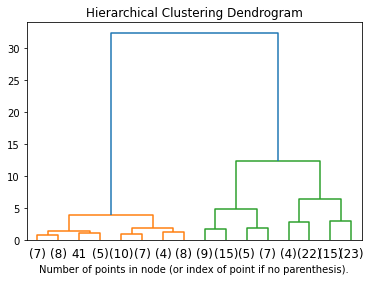

In [87]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram

# Example taken from Scikit-Learn's documentation

# Iris data
X = load_iris().data

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.figure()
plt.title('Hierarchical Clustering Dendrogram')

# Agglomerative clustering with *complete* linkage
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()